<a href="https://colab.research.google.com/github/RodrigoZonzin/complex_networks/blob/main/codigo/beetweeness_closeness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.3 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#G = nx.from_pandas_edgelist(df, 'member1', 'member2')
G = nx.read_edgelist('/content/drive/MyDrive/redes_complexas/FacebookData/facebook_combined.txt',create_using=nx.Graph(), nodetype = int)

In [ ]:
graus = list(G.degree)

In [ ]:
nx.set_node_attributes(G, graus, "grau")

In [ ]:
metricas = pd.DataFrame(columns = ['vertice', 'grau', 'betweenness', 'closeness', 'autovetor'])

In [ ]:
metricas['vertice'] = list(G.nodes)
metricas['grau'] = [grau[1] for grau in G.degree]


In [ ]:
metricas

,vertice,grau,betweenness,closeness,autovetor
0,0,347,NaN,NaN,NaN
1,1,17,NaN,NaN,NaN
2,2,10,NaN,NaN,NaN
3,3,17,NaN,NaN,NaN
4,4,10,NaN,NaN,NaN
...,...,...,...,...,...
4034,4034,2,NaN,NaN,NaN
4035,4035,1,NaN,NaN,NaN
4036,4036,2,NaN,NaN,NaN
4037,4037,4,NaN,NaN,NaN


In [ ]:
import igraph as ig

In [ ]:
ig_g = ig.Graph.from_networkx(G)

In [ ]:
cen = ig_g.betweenness(directed=False)
clo = ig_g.closeness()
eigen = ig_g.eigenvector_centrality()

In [ ]:
metricas['betweenness'] = cen
metricas['closeness'] = clo

In [ ]:
metricas

,vertice,grau,betweenness,closeness,autovetor
0,0,347,1.192496e+06,0.353343,3.472899e-04
1,1,17,2.268564e+01,0.261376,6.258107e-06
2,2,10,6.190476e-01,0.261258,2.270065e-06
3,3,17,1.373447e+01,0.261376,6.875723e-06
4,4,10,1.500000e+00,0.261258,2.273515e-06
...,...,...,...,...,...
4034,4034,2,0.000000e+00,0.183989,3.071930e-09
4035,4035,1,0.000000e+00,0.183980,3.032079e-09
4036,4036,2,0.000000e+00,0.183989,3.051111e-09
4037,4037,4,5.833333e-01,0.184005,3.111359e-09


In [ ]:
# Create a list of 10 nodes numbered [0, 9]
nodes = G.nodes
node_sizes = []
labels = {}
for n in nodes:
        node_sizes.append( graus[n][1]/max(metricas['grau'] ))
        labels[n] = graus[n][1]/max(metricas['grau'])

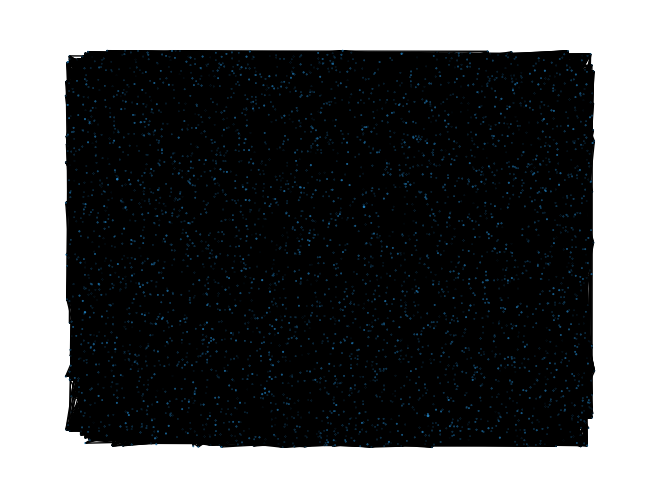

In [ ]:
nx.draw_random(G, node_size = node_sizes, labels=labels, with_labels=False)

In [ ]:
# Node sizes: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

# Connect each node to its successor
edges = [ (i, i+1) for i in range(len(nodes)-1) ]

# Create the graph and draw it with the node labels
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

nx.draw_random(g, node_size = node_sizes, labels=labels, with_labels=True)
plt.show()